### Imports & Definitions

In [29]:
import sys
sys.path.append("../../utils")
from definitions import *
from matplotlib_helpers import plot_tokens_distributions
from huggingface_helpers import get_tokenizer, get_model, get_num_tokens

### Visualize tokens graphic

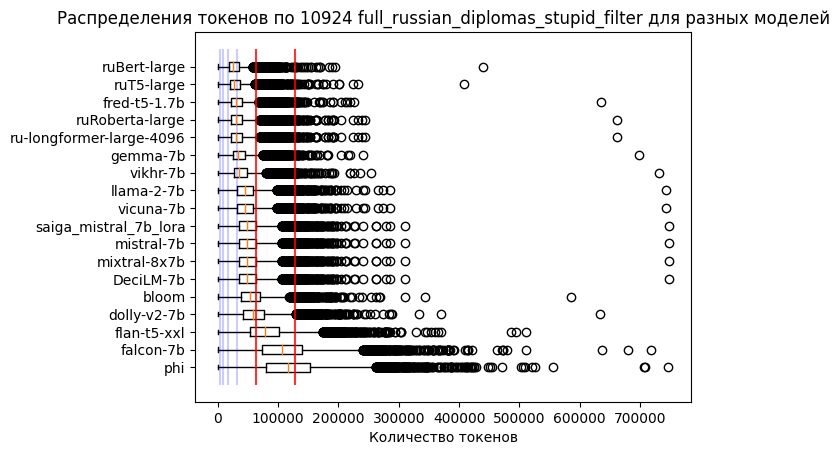

In [18]:
plot_tokens_distributions(ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_stupid_filter"), vlines_blue=[4000, 8000, 16000, 32000], vlines_red=[64000, 128000])

### Calcultate tokens for test set diplomas (2023)

In [20]:
model_to_repo = copy.deepcopy(HUGGINGFACE_MODEL_TO_REPO)
model_to_repo.pop(YALM_100B)
model_to_repo.pop(RUGPT3_XL)
model_to_repo

{'llama-2-7b': 'meta-llama/Llama-2-7b-hf',
 'falcon-7b': 'tiiuae/falcon-7b',
 'bloom': 'bigscience/bloom',
 'flan-t5-xxl': 'google/flan-t5-xxl',
 'fred-t5-1.7b': 'ai-forever/FRED-T5-1.7B',
 'phi': 'microsoft/phi-2',
 'dolly-v2-7b': 'databricks/dolly-v2-7b',
 'DeciLM-7b': 'Deci/DeciLM-7B',
 'saiga_mistral_7b_lora': 'IlyaGusev/saiga_mistral_7b_lora',
 'vicuna-7b': 'lmsys/vicuna-7b-v1.5',
 'vikhr-7b': 'Vikhrmodels/Vikhr-7b-0.1',
 'ru-longformer-large-4096': 'kazzand/ru-longformer-large-4096',
 'mistral-7b': 'mistralai/Mistral-7B-v0.1',
 'mixtral-8x7b': 'mistralai/Mixtral-8x7B-v0.1',
 'gemma-7b': 'google/gemma-7b',
 'ruT5-large': 'ai-forever/ruT5-large',
 'ruBert-large': 'ai-forever/ruBert-large',
 'ruRoberta-large': 'ai-forever/ruRoberta-large',
 'ruElectra-large': 'ai-forever/ruElectra-large',
 'mt5-xxl': 'google/mt5-xxl',
 'ru-e5-base': 'hivaze/ru-e5-base'}

In [27]:
test_df = pd.read_csv(ARTIFACTS_DIR_PATH.joinpath("parsing/diplomas/spbu/russian_stupid_filter_dataset.csv"))
test_df = test_df[test_df["year"] == 2023]
test_df.head()

,id,year,diploma,abstract
0,41453,2023,Санкт-Петербургский государственный университе...,Абдуллаев Ш.У. тема диссертации: «Роль политик...
1,43790,2023,Санкт-Петербургский государственный университе...,Выпускная квалификационная работа посвящена из...
2,41165,2023,Санкт-Петербургский государственный университе...,В данной работе описывается реализация обобщен...
3,42349,2023,ПРАВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ \nСАНКТ-ПЕТ...,В выпускной квалификационной работе раскрывает...
4,40166,2023,Федеральное государственное бюджетное образова...,На сегодняшний день наблюдается высокий спрос ...


In [28]:
len(test_df)

1387

In [30]:
debug=True
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_2023_stupid_filter/")
output_dir_path.mkdir(exist_ok=True, parents=True)
output_dir_path_abstract = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_2023_stupid_filter_abstract/")
output_dir_path_abstract.mkdir(exist_ok=True, parents=True)
failed = []
for model, repo in tqdm(model_to_repo.items(), desc="Models..."):
    try:
        tokenizer = get_tokenizer(model, repo)
        id_to_tokens = dict()
        id_to_tokens_abstract = dict()
        for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Rows..."):
            id_to_tokens[row["id"]] = get_num_tokens(tokenizer, row["diploma"])
            id_to_tokens_abstract[row["id"]] = get_num_tokens(tokenizer, row["abstract"])
        with open(output_dir_path.joinpath(f"{model}.json"), "w") as f:
            json.dump(id_to_tokens, f, indent=2, ensure_ascii=False)
        with open(output_dir_path_abstract.joinpath(f"{model}.json"), "w") as f:
            json.dump(id_to_tokens_abstract, f, indent=2, ensure_ascii=False)
    except Exception as e:
        if debug:
            print(f"failed {model} with exception {e}")
        failed.append(model)
if failed:
    print(f"Failed: {failed}.\nCheck that you logged in to hugginface and have permissions for those models.")
else:
    print("All ok")

Models...:   0%|          | 0/21 [00:00<?, ?it/s]

/Users/nvdenisov2002/study/8-semester/diploma/.conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Rows...:   0%|          | 0/1387 [00:00<?, ?it/s]

Rows...:   0%|          | 0/1387 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (171428 > 2048). Running this sequence through the model will result in indexing errors


Rows...:   0%|          | 0/1387 [00:00<?, ?it/s]

Rows...:   0%|          | 0/1387 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (146942 > 512). Running this sequence through the model will result in indexing errors
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Rows...:   0%|          | 0/1387 [00:00<?, ?it/s]